# Usage examples for `assignment` module

This module provides a lightweight implementation of the Gale-Shapley stable assignment (proposal) algorithm and a few tools for exploring the stable assignment polytope, including a modified implementation of the optimal stable marriage algorithm described by in the following reference:

- Irving, Robert W., Paul Leather, and Dan Gusfield. 1987. &ldquo;An Efficient Algorithm for the &lsquo;Optimal&rsquo; Stable Marriage.&rdquo; *Journal of the Association for Computing Machinery* 34, no. 3 (July): 532&ndash;43.

In [1]:
from assignment import *
%store -r

## One-to-one assignment examples

### Small example

This is the example used in the discussion notebook.

Text(0.5, 1.0, 'Rotation flow graph')

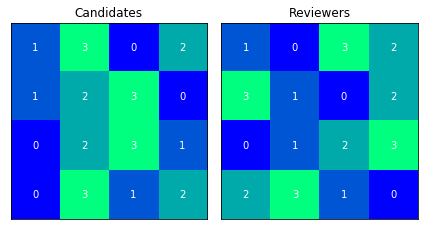

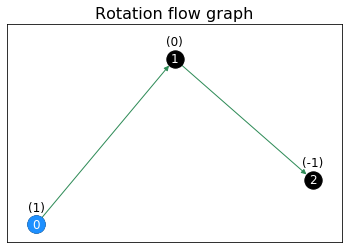

In [2]:
candidates = [[1, 3, 0, 2], [1, 2, 3, 0], [0, 2, 3, 1], [0, 3, 1, 2]]
reviewers = [[1, 0, 3, 2], [3, 1, 0, 2], [0, 1, 2, 3], [2, 3, 1, 0]]

assn_inst = assignment(candidates, reviewers)

viz_prefs(candidates, reviewers)

assn_inst.draw_rotation_digraph()
plt.title("Rotation flow graph", size=16)

In [3]:
# The optimal stable assignment and verbose solution
assn_inst.osa(verbose=True)

Generating shortlists
Reduced candidate lists:
[[1, 3, 0, 2], [1, 2, 3, 0], [0, 2, 3, 1], [0, 3, 1, 2]]
Results of round 0:
  Candidate 2 proposed to reviewer 0
  Candidate 3 proposed to reviewer 0
    Reviewer 0 rejected candidate 2
  Candidate 0 proposed to reviewer 1
  Candidate 1 proposed to reviewer 1
    Reviewer 1 rejected candidate 0
Reduced candidate lists:
[[3, 0, 2], [1, 2, 3, 0], [2, 3, 1], [0, 3, 1, 2]]
Results of round 1:
  Candidate 3 proposed to reviewer 0
  Candidate 1 proposed to reviewer 1
  Candidate 2 proposed to reviewer 2
  Candidate 0 proposed to reviewer 3

Finding rotations
C0's second choice is R0, currently matched with C3
C3's second choice is R3, currently matched with C0
  Found a rotation involving candidates [0, 3]
C1's second choice is R2, currently matched with C2
C2's second choice is R3, currently matched with C0

Eliminating rotations
  Eliminating rotation [0, 3], weight 1

Shortlists after eliminating rotations at depth 0
[[0, 2], [1, 2, 0], [2, 

([(0, 1), (1, 3), (2, 0), (3, 2)], array([ True, False, False]))

## Multiple assignment examples

We can use the Gale-Shapley algorithm to find stable matchings in many-to-one and one-to-many assignment problems, too. However, the Irving et al. algorithm for rotation through stable matchings cannot be used in this case, as eliminating the rotations may violate the stability conditions (Baïou and Balinski, 2000).



In [4]:
# Universities with fixed quotas propose to applicants (one-to-many)
applicants = [[0,1,4,3],[1,4,3,0,2,],[1,4,3],[0,1,3],[0,2,1,3,4],[0,1,3]]
universities = [[0,1,2,3],
                [0,2,1],
                [0,1,2,3,4,5],
                [1,0,3,2,4,5],
                [0,1,2,3]]

university_capacities = [2, 2, 4, 4, 3]

admissions = assignment(applicants, universities, reviewer_capacity=university_capacities)
print(admissions.GaleShapley(reverse=True))

# Applicants propose to universities with fixed quotas (many-to-one)
print(admissions.GaleShapley())

([(0, 0), (0, 3), (1, 2), (1, 1), (2, 4), (3, 5)], [[0, 3], [2, 1], [4], [5], []])
([(0, 0), (1, 1), (2, 1), (3, 0), (4, 2), (5, 3)], [[0, 1, 4, 3], [1, 4, 3, 0, 2], [1, 4, 3], [0, 1, 3], [2, 1, 3, 4], [3]])


## Behavior when no rotations are present

In [5]:
# Men propose to women (one-to-one)
# Contains only one stable matching
men = [[0, 1, 2],
       [0, 1, 3],
       [1, 0, ],
       [0, 1],
       [1, 0, 3]]
women = [[0, 1, 2, 4, 3],
         [0, 1, 4,],
         [0, 2, 1, 3],
         [1, 0, 4]]

proposal = assignment(men, women)
print(proposal.GaleShapley())
print(proposal.GaleShapley(reverse=True))

# Empty output expected
proposal.rotation_digraph()

([(0, 0), (1, 1), (4, 3)], [[0, 1, 2], [1, 3], [], [], [3]])
([(0, 0), (1, 1), (3, 4)], [[0, 1, 2, 4, 3], [1, 4], [], [4]])


[[], [], [], [], []]

In [6]:
applicants = [[11, 12, 10, 8, 9, 7, 6, 5, 4, 3, 2, 1, 0],
              [11, 10, 12, 9, 6, 8, 7, 5, 1, 4, 3, 2, 0],
              [12, 10, 9, 11, 8, 7, 6, 5, 4, 1, 0, 3, 2],
              [11, 12, 9, 10, 8, 6, 7, 5, 2, 4, 3, 1, 0],
              [11, 12, 10, 9, 7, 6, 8, 5, 4, 2, 1, 3, 0],
              [9, 11, 12, 10, 8, 7, 6, 5, 4, 3, 2, 1, 0],
              [12, 9, 10, 11, 7, 8, 6, 5, 2, 1, 0, 4, 3],
              [12, 11, 9, 10, 8, 7, 6, 5, 1, 4, 3, 2, 0],
              [12, 11, 10, 9, 7, 8, 6, 5, 3, 2, 4, 1, 0]]

firms = [[0,2,8,3,4,7,1,6,5],
         [2,0,8,4,7,3,6,1,5],
         [0,8,2,4,1,3,7,5,6],
         [2,3,0,7,8,4,5,6,1],
         [0,2,3,8,4,1,7,5],
         [0,2,8,4,3,1,5],
         [2,0,3,8,1],
         [0,2,1,4],
         [0,2,4],
         [0,2],
         [2,4],
         [0,2],
         [2,0]]

hiring = assignment(applicants, firms)

# Empty output expected
hiring.rotation_digraph()

[[], [], [], [], []]

In [ ]:
!jupyter nbconvert --to html assignment_exs.ipynb